<a href="https://colab.research.google.com/github/IPMSand/NLP-Module/blob/main/NLP_lec_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
# Cropus
cropus =[
    "I love Python programming",
    "Python is great for machine learning",
    "I love coding in Python"
]

In [ ]:
# Cropus
cropus2 =[
    "I love Python programming. I'm a tree.",
    "Python is great for machine learning",
    "I love coding in Python . I have a car"
]

In [ ]:
# Bag-of-Work
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cropus)

In [ ]:
# Convert to Dataframe for easy view
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df)

   coding  for  great  in  is  learning  love  machine  programming  python
0       0    0      0   0   0         0     1        0            1       1
1       0    1      1   0   1         1     0        1            0       1
2       1    0      0   1   0         0     1        0            0       1


# Visualize

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

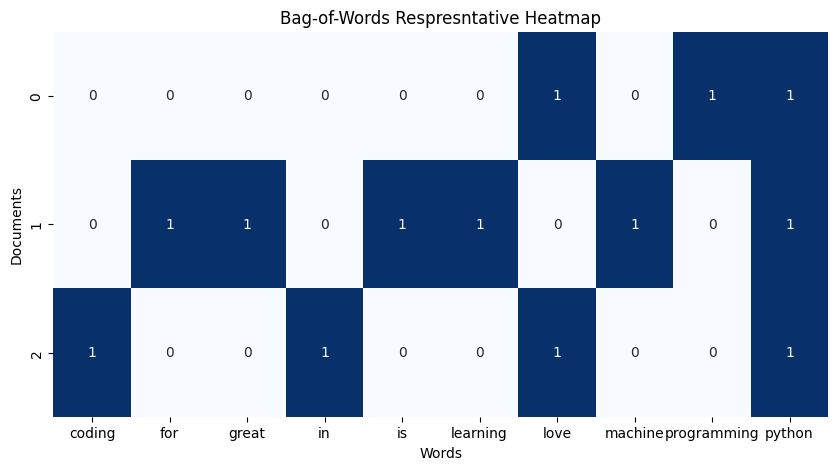

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(bow_df, annot=True, cmap="Blues", cbar =False)
plt.xlabel("Words")
plt.ylabel("Documents")
plt.title("Bag-of-Words Respresntative Heatmap")
plt.show()

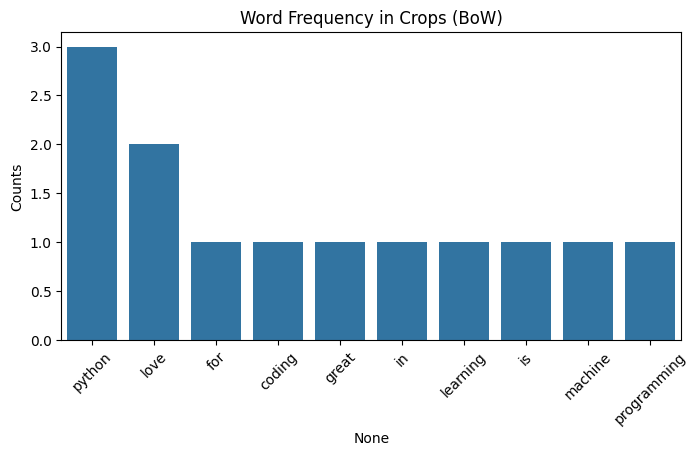

In [ ]:
word_freq = bow_df.sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=word_freq.index, y=word_freq.values)
plt.xticks(rotation=45)
plt.title("Word Frequency in Crops (BoW)")
plt.ylabel("Counts")
plt.show()

# Section 2



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
# corpus
corpus = [
   "I love python programming.",
   "Python is great for machine learning.",
  "i love coding in python",
  # "The Freshman is a 1925 American silent comedy film that tells the story of a college freshman trying to become popular by joining the school football team."
]


In [3]:
# corpus 2 for experiment
corpus2 = [
   "Harold Lamb (Harold Lloyd), a bright-eyed but naive young man, enrolls at Tate University. On the train there, he meets Peggy (Jobyna Ralston). They are attracted to each other.",
   "Harold thinks he is popular, when in fact he is the laughingstock of the whole school. His only real friend is Peggy, who turns out to be his landlady's daughter. She is described in one of the film's title cards as the kind of girl your mother must have been",
]


> TF - IDF vectorizer

In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF DataFrame:\n")
print(df_tfidf)

TF-IDF DataFrame:

     coding       for     great        in        is  learning      love  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.547832   
1  0.000000  0.432385  0.432385  0.000000  0.432385  0.432385  0.000000   
2  0.584483  0.000000  0.000000  0.584483  0.000000  0.000000  0.444514   

    machine  programming    python  
0  0.000000     0.720333  0.425441  
1  0.432385     0.000000  0.255374  
2  0.000000     0.000000  0.345205  


In [4]:
# Example 2---->
#Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus2)

# Convert to DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF DataFrame:\n")
print(df_tfidf)

TF-IDF DataFrame:

        are        as        at  attracted        be      been    bright  \
0  0.192272  0.000000  0.192272   0.192272  0.000000  0.000000  0.192272   
1  0.000000  0.115745  0.000000   0.000000  0.115745  0.115745  0.000000   

        but     cards  daughter  ...     title        to     train     turns  \
0  0.192272  0.000000  0.000000  ...  0.000000  0.136803  0.192272  0.000000   
1  0.000000  0.115745  0.115745  ...  0.115745  0.082354  0.000000  0.115745   

   university      when       who     whole     young      your  
0    0.192272  0.000000  0.000000  0.000000  0.192272  0.000000  
1    0.000000  0.115745  0.115745  0.115745  0.000000  0.115745  

[2 rows x 62 columns]


## Heatmap

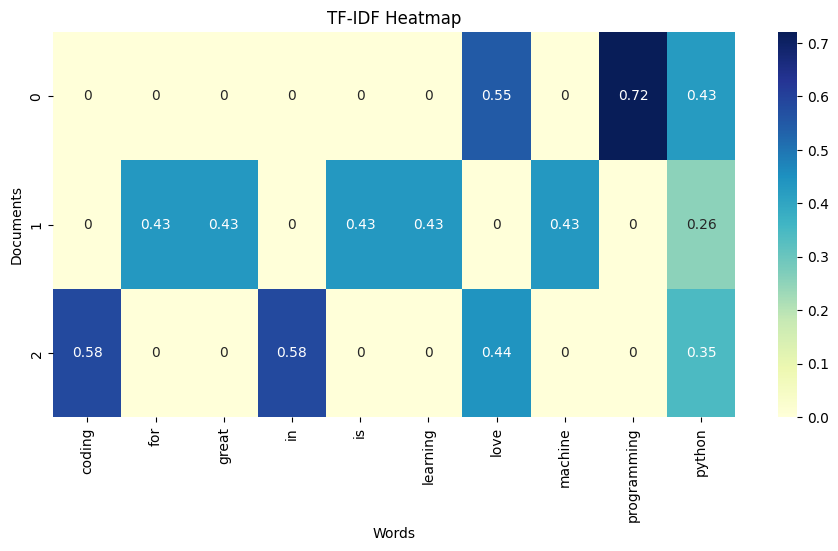

In [ ]:
# --- Heatmap ---
plt.figure(figsize=(11, 5))
sns.heatmap(df_tfidf, annot=True, cmap="YlGnBu", xticklabels=vectorizer.get_feature_names_out())
plt.title("TF-IDF Heatmap")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

## Barplot

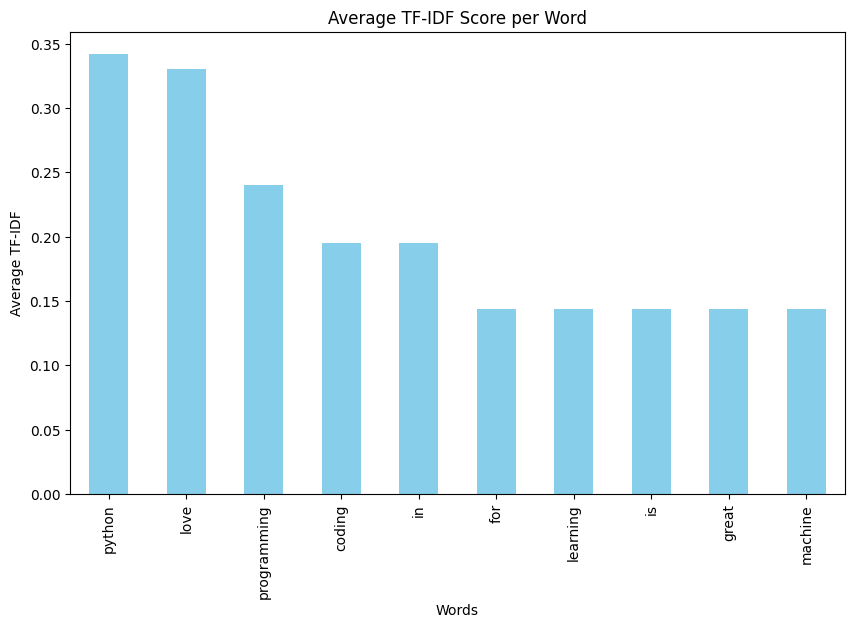

In [ ]:
# --- Barplot (mean TF-IDF score for each word) ---
plt.figure(figsize=(10, 6))
df_tfidf.mean().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Average TF-IDF Score per Word")
plt.ylabel("Average TF-IDF")
plt.xlabel("Words")
plt.show()

### Exapmle 2 :-

In [ ]:
# Example 2---->
#Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus2)

# Convert to DataFrame
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF DataFrame:\n")
print(df_tfidf)

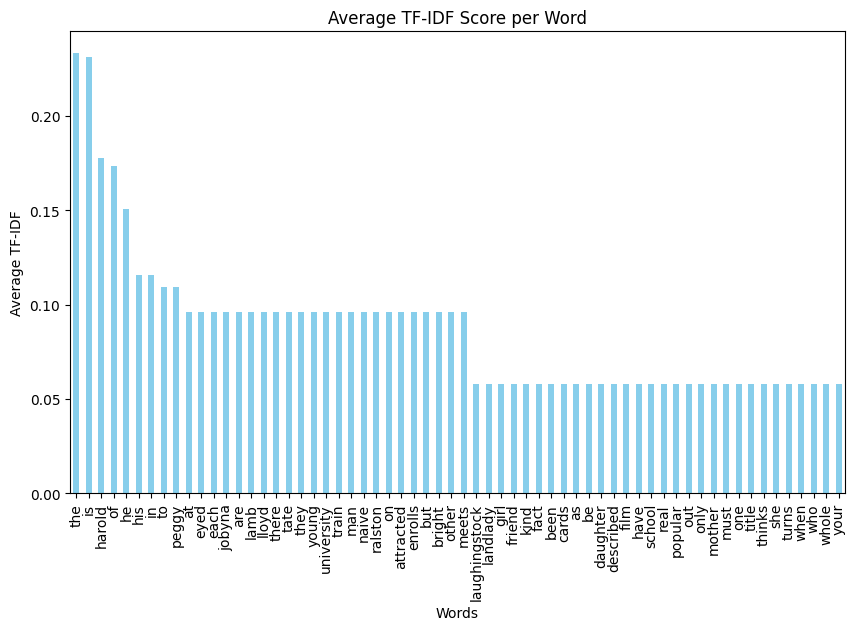

In [5]:
# Example 2
plt.figure(figsize=(10, 6))
df_tfidf.mean().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Average TF-IDF Score per Word")
plt.ylabel("Average TF-IDF")
plt.xlabel("Words")
plt.show()

# Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

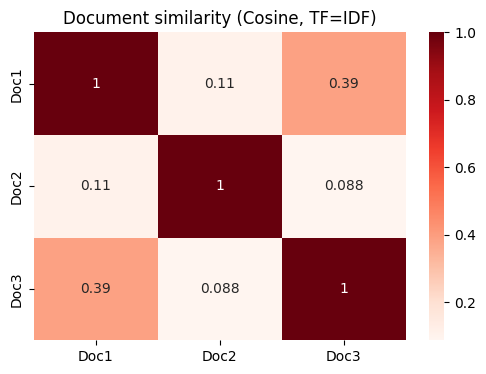

In [ ]:
# Cosine similarity between docs
cos_sim = cosine_similarity(X) # THIS "x" WAS TAKEN FROM FT-IDF

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cos_sim, annot=True, cmap="Reds", xticklabels=["Doc1", "Doc2", "Doc3"], yticklabels=["Doc1", "Doc2", "Doc3"])
plt.title("Document similarity (Cosine, TF=IDF)")
plt.show()

# PCA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [ ]:
# corpus
corpus = [
   "I love python programming.",
   "Python is great for machine learning.",
   "i love coding in python",

]


In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:
# PCA reduce TF-IDF to 20
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

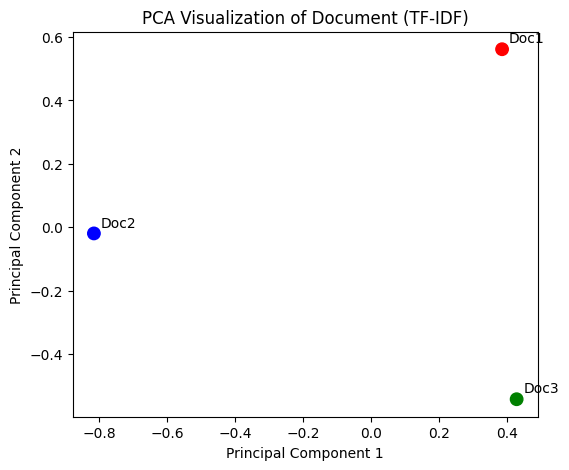

In [ ]:
# Plotting
plt.figure(figsize=(6, 5)) # figure size for good x and x range
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=["red", "blue", "green"], s=80) # 's' is dot's size

# Add document labels
for i, txt in enumerate(["Doc1", "Doc2", "Doc3"]):
    plt.annotate(txt, (X_pca[i, 0] +0.02, X_pca[i, 1] + 0.02))


plt.title("PCA Visualization of Document (TF-IDF)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Section - Having a custom tokernizer ▶

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
nltk.download('punkt_tab') # This need for last code section

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Download NLTK resources (run only once) (already done)
# Preprocessing: stopwords + lemmatization
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def custom_tokenizer(text):
    # Tokenize
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens



In [ ]:
# Crops
corpus = [
    "I love Python programming",
    "Python is great for machine learning",
    "I love coding in Python ad ML",
    "Machine learning enables artificial intelligence",
    "Deep learning and Python are widely used in AI"
]


In [ ]:

#TF-IDF with custom tokenizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(corpus)

# Convert to DataFrame

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df)

         ad        ai  artificial    coding      deep   enables     great  \
0  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  0.643246   
2  0.501992  0.000000    0.000000  0.501992  0.000000  0.000000  0.000000   
3  0.000000  0.000000    0.493899  0.000000  0.000000  0.493899  0.000000   
4  0.000000  0.458065    0.000000  0.000000  0.458065  0.000000  0.000000   

   intelligence  learning      love   machine        ml  programming  \
0      0.000000  0.000000  0.575063  0.000000  0.000000     0.712775   
1      0.000000  0.430789  0.000000  0.518967  0.000000     0.000000   
2      0.000000  0.000000  0.405004  0.000000  0.501992     0.000000   
3      0.493899  0.330770  0.000000  0.398475  0.000000     0.000000   
4      0.000000  0.306771  0.000000  0.000000  0.000000     0.000000   

     python      used    widely  
0  0.401565  0.000000  0.000000  
1  0.362393  0.000000  0.000000  
2 